<a href="https://colab.research.google.com/github/Ziad-o-Yusef/Deep-learning-notes/blob/main/6_Image_Processing_Wth_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.0 :** Import  Libraries 

In [1]:
from google.colab import drive 
drive.mount('/content/drive')
import os 
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/Kaggle_MyAPI"

Mounted at /content/drive


In [30]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import cv2
import numpy as np


## **1.1 :** Get Data

In [2]:
! kaggle datasets download -d anshulmehtakaggl/chess-pieces-detection-images-dataset

  0% 0.00/3.47M [00:00<?, ?B/s]
100% 3.47M/3.47M [00:00<00:00, 294MB/s]


In [ ]:
! unzip /content/chess-pieces-detection-images-dataset.zip

In [15]:
queen_dir = '/content/Queen-Resized'
rook_dir ='/content/bishop_resized'
bishop_dir = '/content/bishop_resized'
knight_dir = '/content/knight-resize'
pawn_dir = '/content/pawn_resized'
dirs = [queen_dir,rook_dir,bishop_dir,knight_dir,pawn_dir]

In [20]:
queen = os.listdir('/content/Queen-Resized')[:5]
rook = os.listdir('/content/bishop_resized')[:5]
bishop =os.listdir( '/content/bishop_resized')[:5]
knight =os.listdir( '/content/knight-resize')[:5]
pawn = os.listdir('/content/pawn_resized')[:5]
images = []
images = queen + rook + bishop + knight + pawn

## **1.2:** Show a sample with opencv

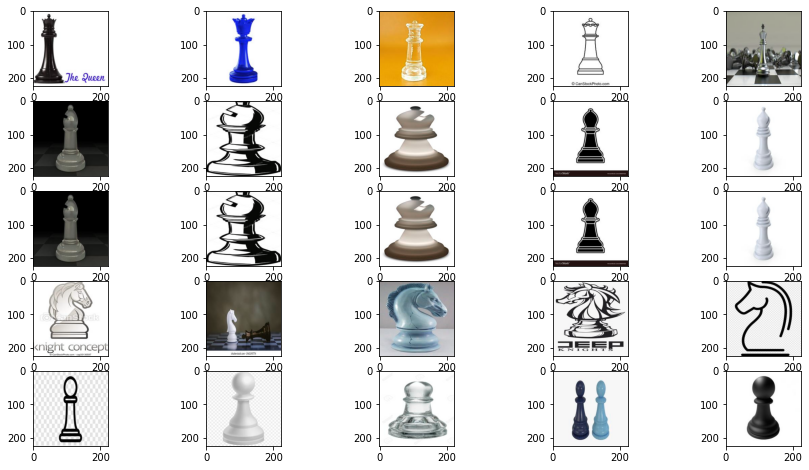

In [25]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path)
        ax[n,m].imshow(image)
        ax[n,m].grid(False)

# **2.0 :** Apllay filters 
## **2.1 :** Converting to HSV

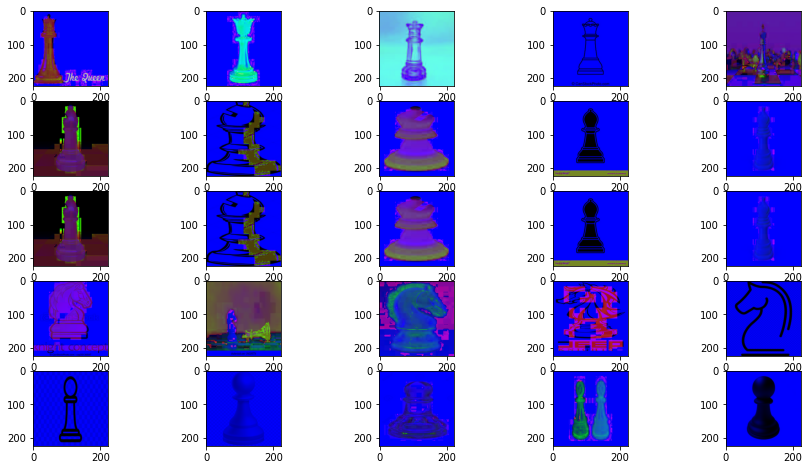

In [26]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        ax[n,m].imshow(img)
        ax[n,m].grid(False)

## **2.2 :** Canny Edge Detection

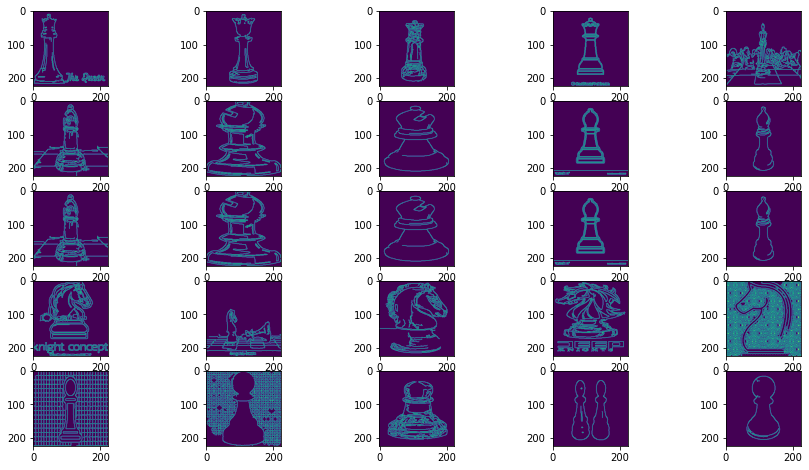

In [34]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path)
        med_val = np.median(image) 
        lower = int(max(0, 0.2* med_val))
        upper = int(min(255,1.3 * med_val))
        edges = cv2.Canny(image=image, threshold1=lower , threshold2=upper+50)
        ax[n,m].imshow(edges)
        ax[n,m].grid(False)

## **2.3:** Different Threshold Types

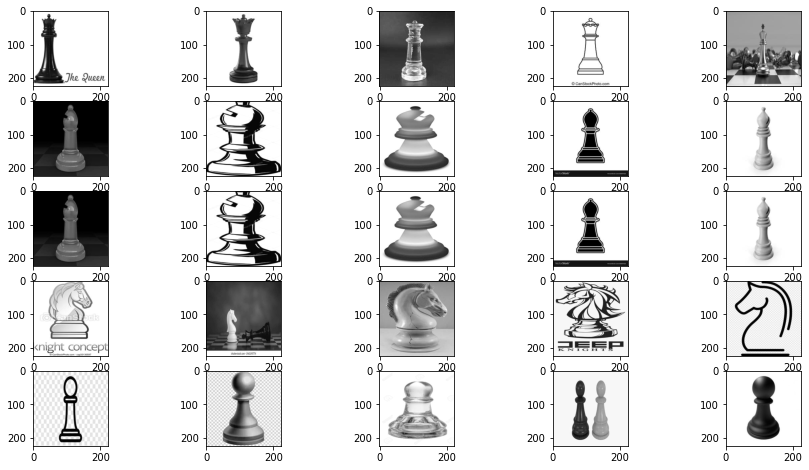

In [36]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path,0)
        ax[n,m].imshow(image,cmap='gray')
        ax[n,m].grid(False)

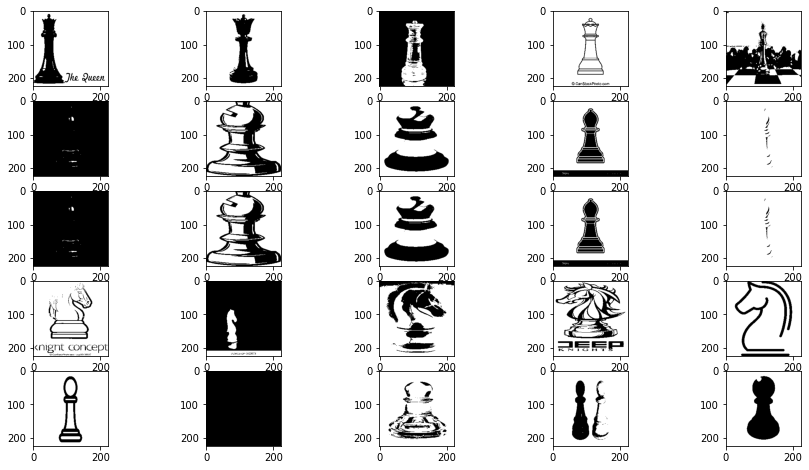

In [46]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path,0)
        ret,thresh2 = cv2.threshold(image,150,255,cv2.THRESH_BINARY)
        ax[n,m].imshow(thresh2,cmap='gray')
        ax[n,m].grid(False)

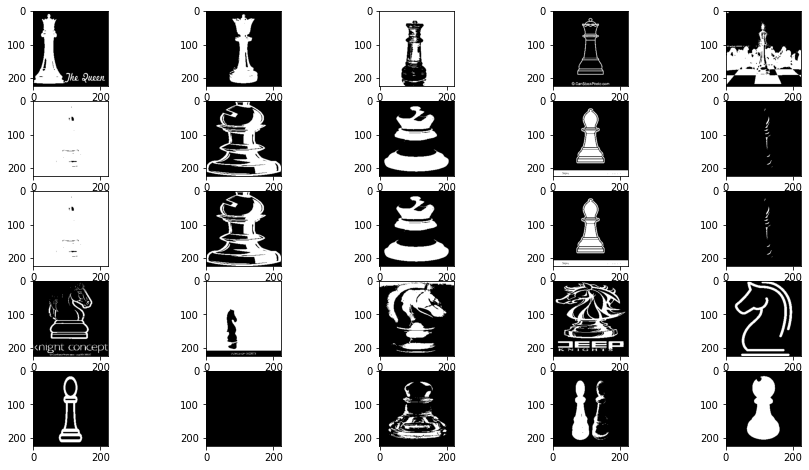

In [47]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path,0)
        ret,thresh2 = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)
        ax[n,m].imshow(thresh2,cmap='gray')
        ax[n,m].grid(False)

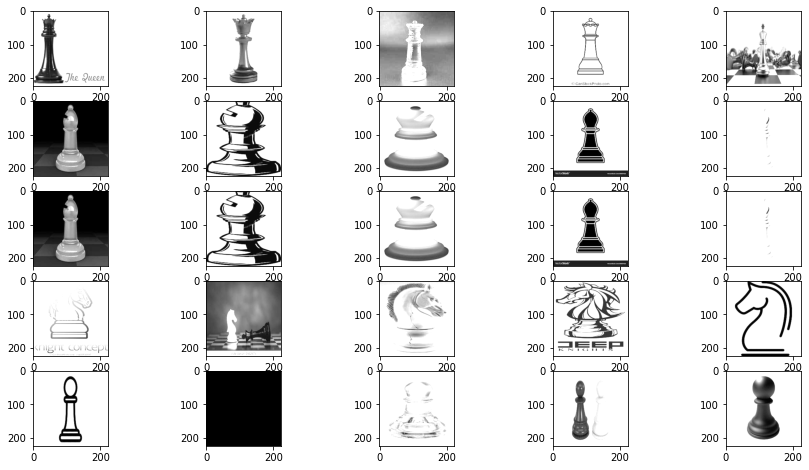

In [48]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path,0)
        ret,thresh2 = cv2.threshold(image,150,255,cv2.THRESH_TRUNC)
        ax[n,m].imshow(thresh2,cmap='gray')
        ax[n,m].grid(False)

## **2.4:** Contour Detection

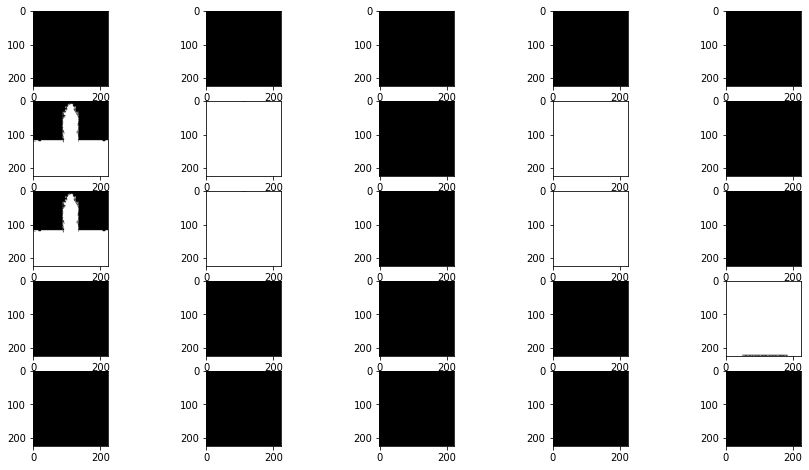

In [57]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        image = cv2.imread(path,0)
        contours, hierarchy = cv2.findContours(image, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
        external_contours = np.zeros(image.shape)
        for i in range(len(contours)):
          if hierarchy[0][i][3] == -1:
            cv2.drawContours(external_contours, contours, i, 255, -1)

        ax[n,m].imshow(external_contours,cmap='gray')
        ax[n,m].grid(False)

## **2.5:** Gamma Correction 

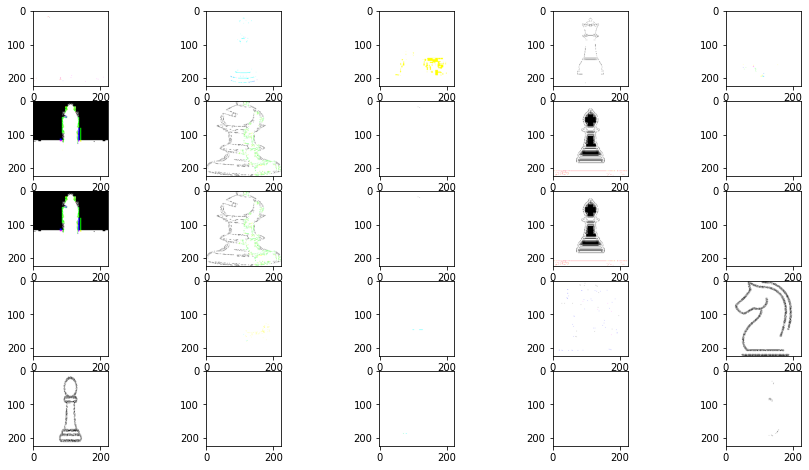

In [59]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        img = cv2.imread(path)
        gamma = 1/4
        effected_image = np.power(img, gamma)
        ax[n,m].imshow(effected_image)
        ax[n,m].grid(False)

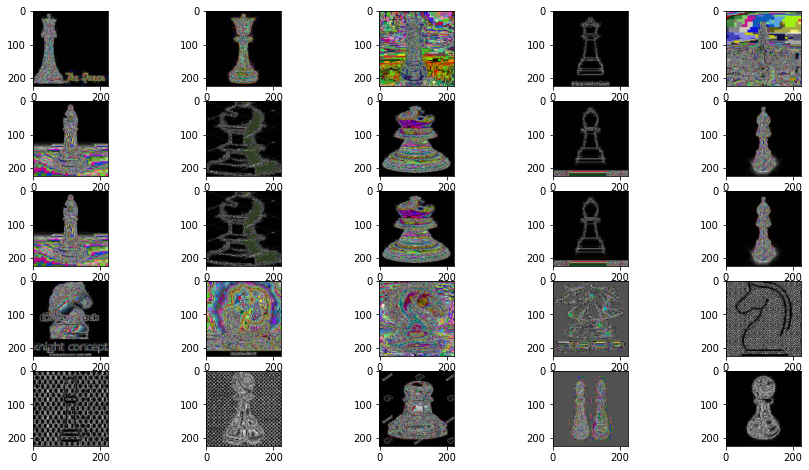

In [60]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        img = cv2.imread(path)
        gamma = 2
        effected_image = np.power(img, gamma)
        ax[n,m].imshow(effected_image)
        ax[n,m].grid(False)

## **2.6:** : Blurring

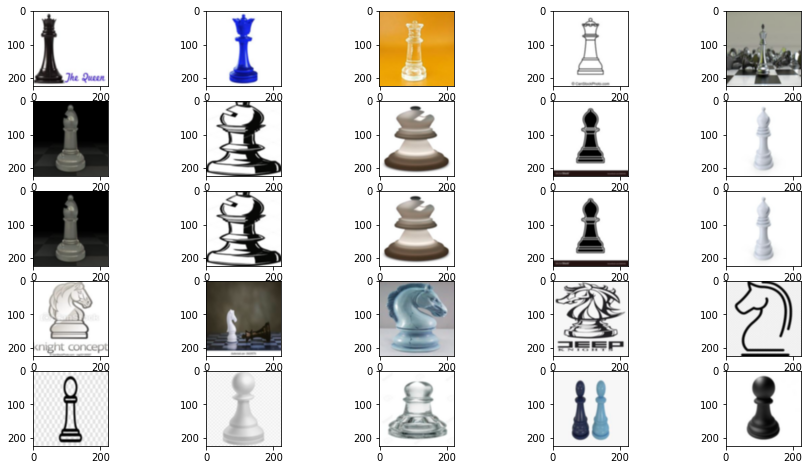

In [61]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        img = cv2.imread(path)
        blurred_img = cv2.GaussianBlur(img,(5,5),10)
        ax[n,m].imshow(blurred_img)
        ax[n,m].grid(False)

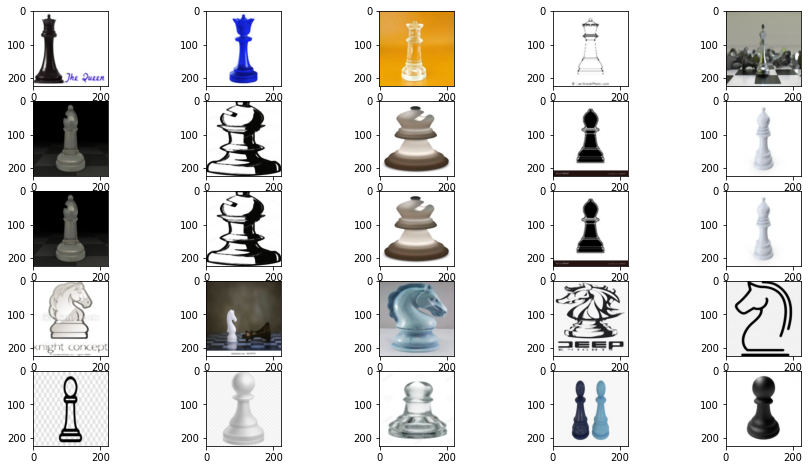

In [64]:
fig, ax = plt.subplots(5,5,figsize=(15,8))
for n in range(5):
    for m in range(5):
        idx = images[m + 5*n]
        path =os.path.join(dirs[n],idx)
        img = cv2.imread(path)
        blurred_img =  cv2.medianBlur(img,5)
        ax[n,m].imshow(blurred_img)
        ax[n,m].grid(False)